# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/3804414255.py:63: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  stem(freqs, signal1, '-*')


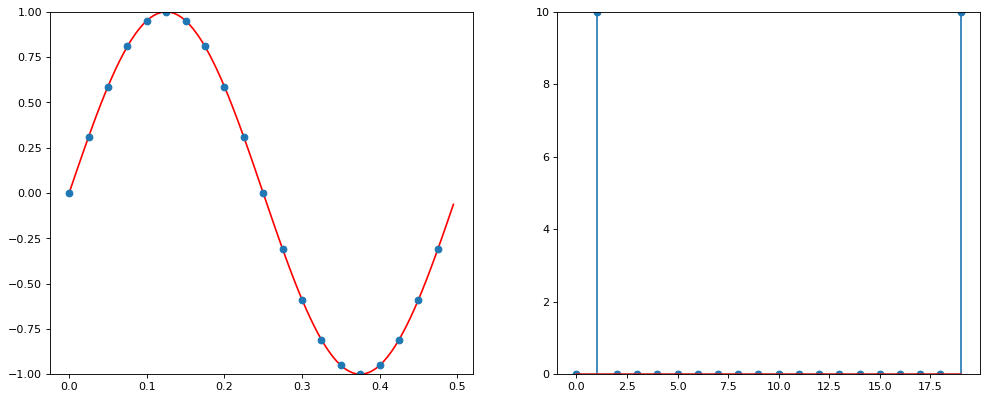

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*np.sin(2*np.pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = np.fft.fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [2]:
# Zdefiniuj funckję
def func_1(A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda x: A*np.sin(2*np.pi*x*f)
    
    signal = FUNC(t)
    signal_f = np.abs(np.fft.fft(signal))/(n/2)  # h)
    freqs = np.linspace(0, w, n) # c)
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = FUNC(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Time (t) [s]') # d)
    plt.ylabel('FUNC(t)')
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
#     plt.ylabel('Count')
    plt.ylabel('Amplitude') # h)
    plt.xlabel('Frequency [Hz]')
    
    plt.show()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [14]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


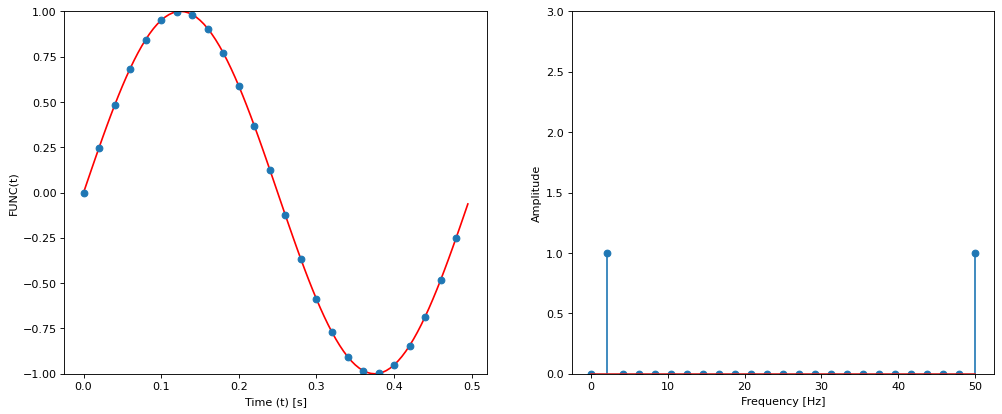

In [3]:
# w=50
func_1(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [4]:
# popraw oś OX
interact(func_1, LP=(1, 5, 1), w=(10, 100, 5))

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=2, description='f', …

<function __main__.func_1(A=1, f=2, w=40, LP=1)>

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [5]:
# Podpisz osie wykresów
interact(func_1, LP=(1, 5, 1), w=(10, 100, 5))

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=2, description='f', …

<function __main__.func_1(A=1, f=2, w=40, LP=1)>

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


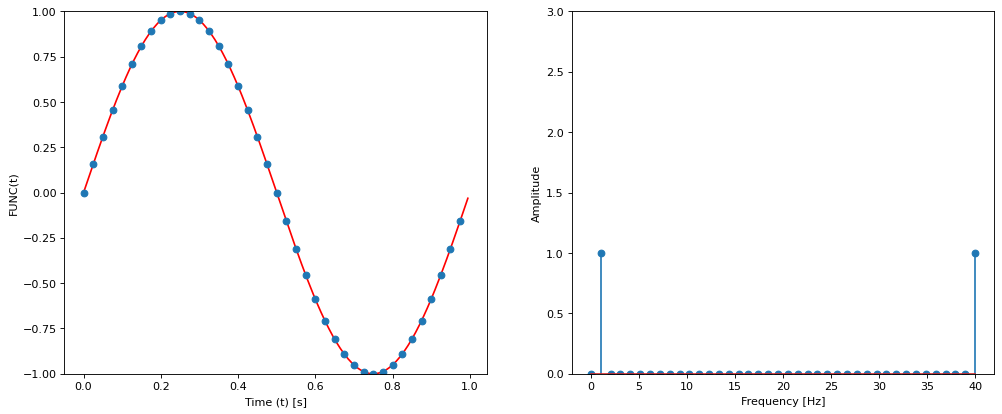

In [6]:
# f=1, A=1, LP=1
func_1(f=1, A=1, LP=1)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


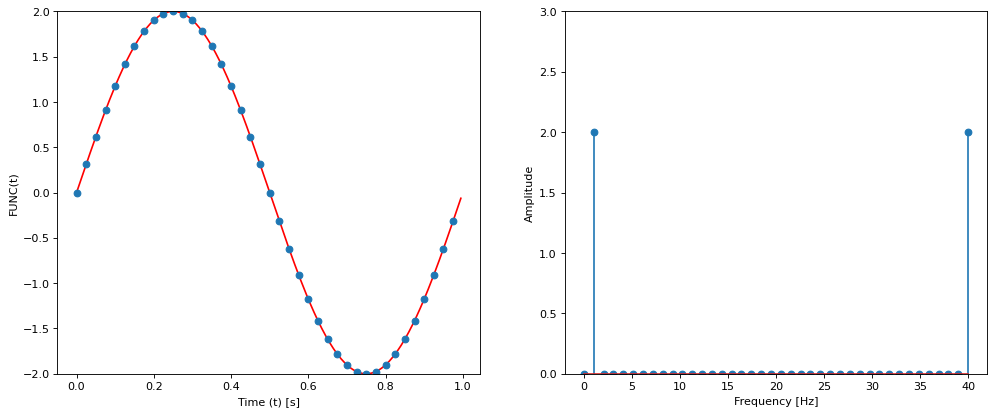

In [7]:
# f=1, A=2, LP=1
func_1(f=1, A=2, LP=1)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


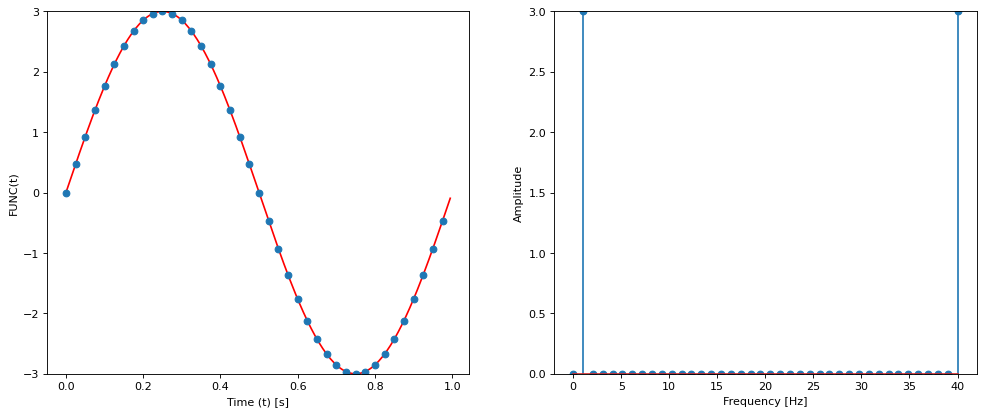

In [8]:
# f=1, A=3, LP=1
func_1(f=1, A=3, LP=1)

In [9]:
interact(func_1, A=(1, 3, 1), w=(10, 100, 5))
"""
Oś OY na wykresie spektrum jest wprost proporcjonalna do amplitudy
(zwiększając amplitudę dwukrotnie, wartość maksymalna na osi OY wzrasta dwukrotnie)
"""

interactive(children=(IntSlider(value=1, description='A', max=3, min=1), IntSlider(value=2, description='f', m…

'\nOś OY na wykresie spektrum jest wprost proporcjonalna do amplitudy\n(zwiększając amplitudę dwukrotnie, wartość maksymalna na osi OY wzrasta dwukrotnie)\n'

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


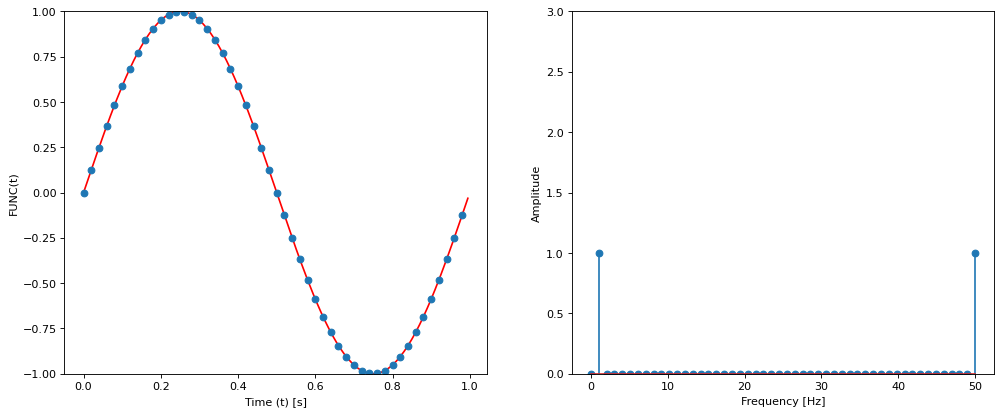

In [10]:
# f=1, w=50, LP=1
func_1(f=1, w=50, LP=1)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


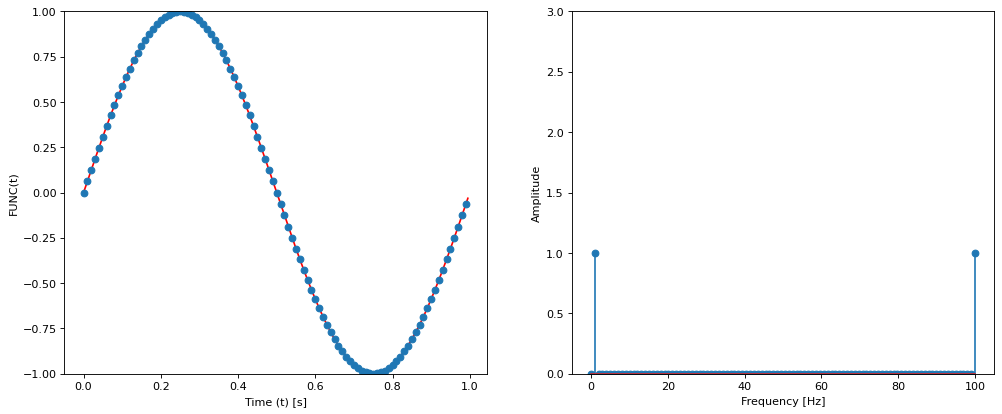

In [11]:
# f=1, w=100, LP=1
func_1(f=1, w=100, LP=1)

In [12]:
interact(func_1, A=(1, 3, 1), w=(10, 100, 5))
"""
Punktów na wykresie jest w (dla pierwszego wykresu 50, dla drugiego 100).
Maksymalna wartość na osi OY jest zależna od częstotliwości próbkowania i dla powyższych przykładów jest ona równa połowie
częstotliwości próbkowania.
"""

interactive(children=(IntSlider(value=1, description='A', max=3, min=1), IntSlider(value=2, description='f', m…

'\nPunktów na wykresie jest w (dla pierwszego wykresu 50, dla drugiego 100).\nMaksymalna wartość na osi OY jest zależna od częstotliwości próbkowania i dla powyższych przykładów jest ona równa połowie\nczęstotliwości próbkowania.\n'

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [13]:
# popraw oś OY
interact(func_1, A=(1, 5, 0.5), w=(10, 100, 5))

interactive(children=(FloatSlider(value=1.0, description='A', max=5.0, min=1.0, step=0.5), IntSlider(value=2, …

<function __main__.func_1(A=1, f=2, w=40, LP=1)>

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


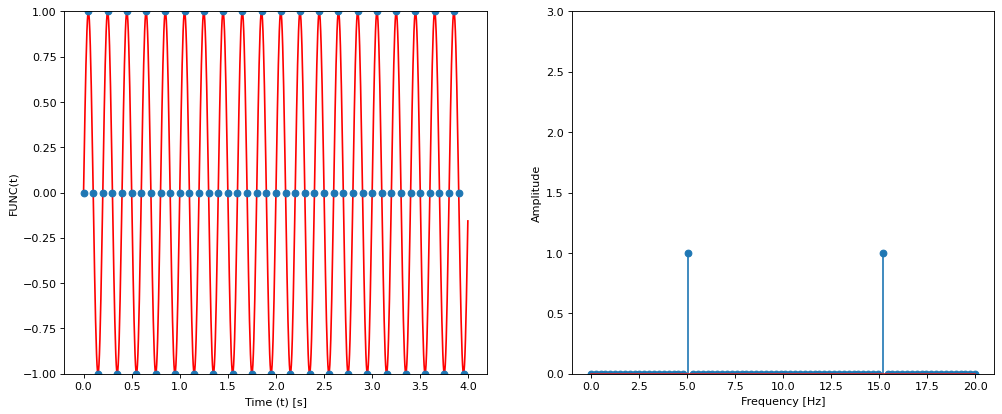

In [14]:
# f=5, w=20, LP=20
func_1(f=5, w=20, LP=20)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


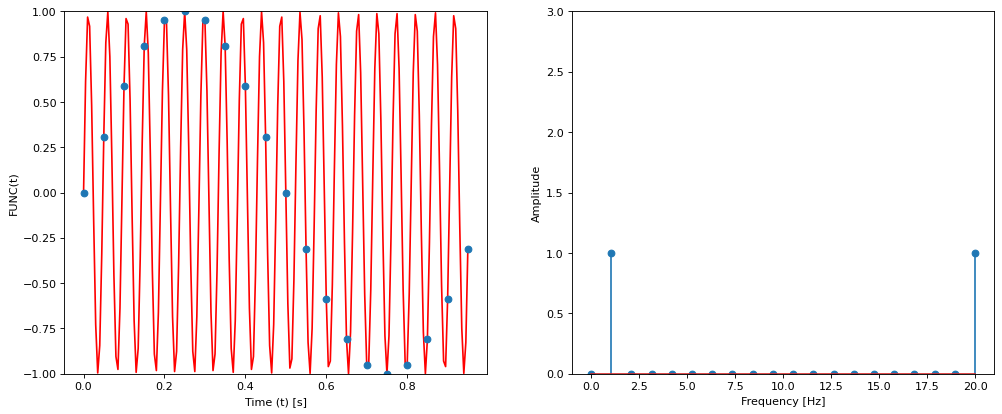

In [15]:
# f=21, w=20, LP=20
func_1(f=21, w=20, LP=20)

##### Z uwagi na niską częstotliwość próbkowania w porównaniu do częstotliwości funkcji sinusoidalnej, spróbkowane wykresy słabo przedstawiają bazową funkcję.  
##### Dla drugiego przypadku uzyskano częstotliwość 20Hz, ponieważ dla powyższych danych wykres spróbkowanej funkcji wygląda jak wykres funkcji sinus dla innej częstotliwości.

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


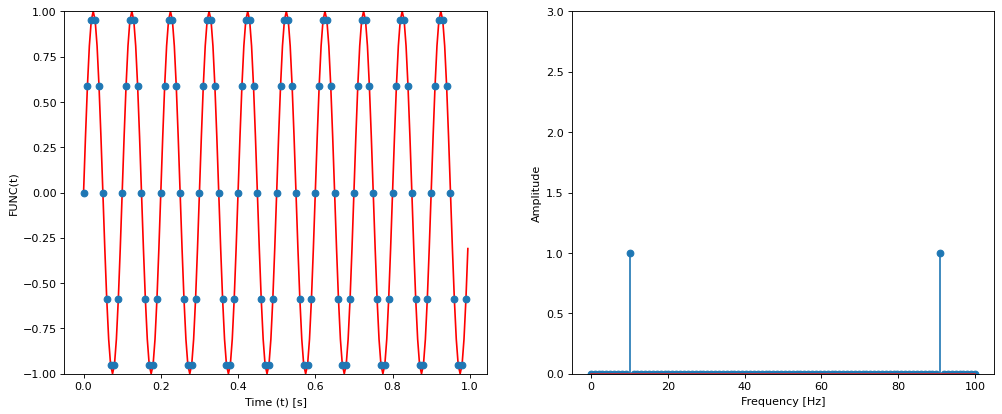

In [16]:
# f=10, w=100, A=1, LP=10
func_1(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


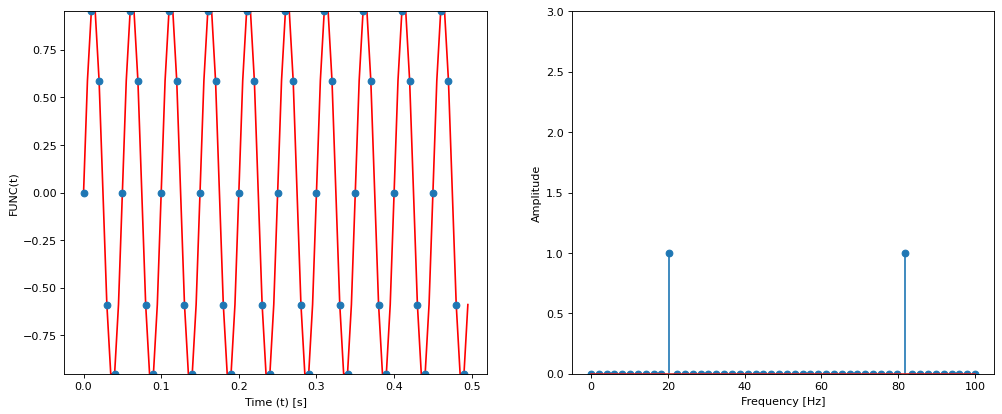

In [17]:
# f=20, w=100, A=1, LP=10
func_1(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


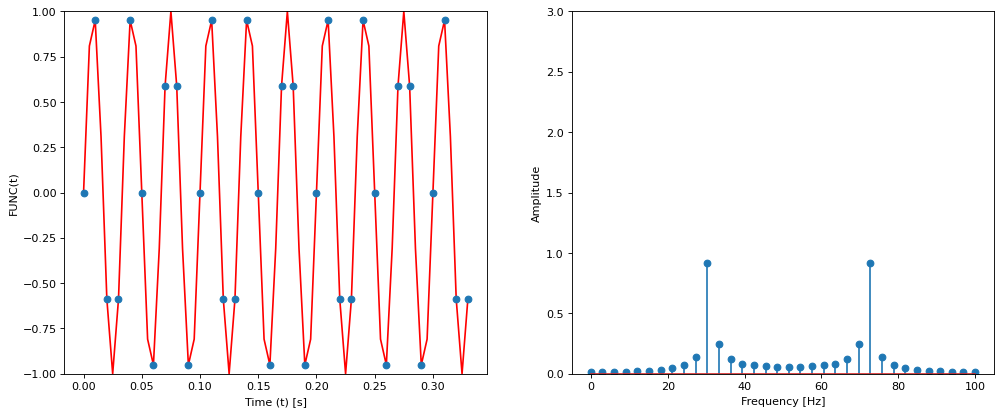

In [18]:
# f=30, w=100, A=1, LP=10
func_1(f=30, w=100, A=1, LP=10)
# słupki nie wyglądają idealnie, ponieważ przy takiej częstotliwości próbkowania i częstotliwości sygnału, spróbkowane wartości
# omijają w niektórych miejscach wartości maksymalne funkcji (amplitudy), przez co wykres spróbkowanych wartości nie wyglądałby
# jak idealny sinus

iv) $sin(2*pi*t*f)$, $f=40Hz$

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


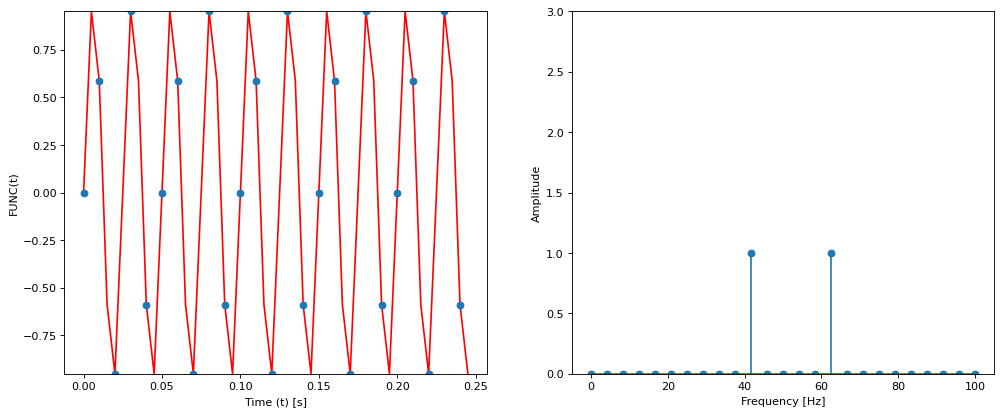

In [19]:
# f=40, w=100, A=1, LP=10
func_1(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2049892875.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


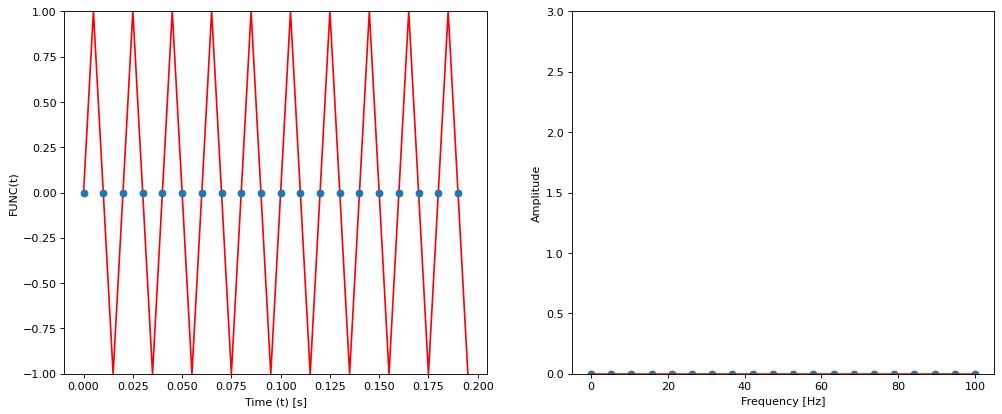

In [20]:
# f=50, w=100, A=1, LP=10
func_1(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

##### Twierdzenie Nyquista-Shannona

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

In [34]:
def func_general(func, A=1, f=1, w=20, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    signal = func(t)
    signal_f = np.abs(np.fft.fft(signal))/(n/2)
    freqs = np.linspace(0, w, n)
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = func(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Time (t) [s]')
    plt.ylabel('FUNC(t)')
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    
    plt.show()

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2105513116.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


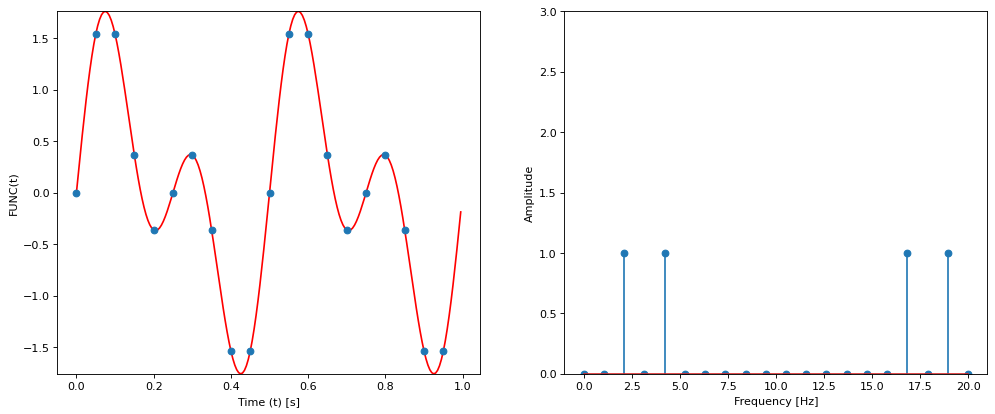

In [35]:
# Wyrysuj sygnał
func_general(f=1, w=20, func=lambda t: np.sin(2*np.pi*t*f) + np.sin(4*pi*t*f))

c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*pi*t))? Czy jesteś w stanie zlokalizować szum?

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/525912342.py:36: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


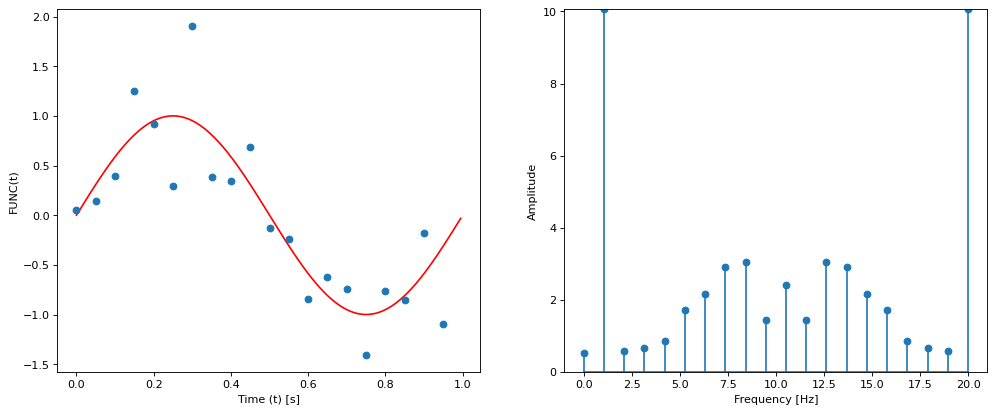

In [77]:
f = 1
w = 20
LP = 1
T = 1/f
TW = 1/w
t = np.arange(0, LP*T, TW)
n = len(t)

clean_func = lambda t: np.sin(2*np.pi*t*f)
signal = clean_func(t)

for _ in range(100):
    A_noise = np.random.uniform(0.02, 0.08)
    f_noise = np.random.uniform(5, 10)
    phi_noise = np.random.uniform(0, 2*np.pi)
    
    noise_func = lambda t: A_noise*np.sin(2*np.pi*t*f_noise + phi_noise)
    noise = noise_func(t)
    signal += noise

signal_f = np.abs(np.fft.fft(signal))
freqs = np.linspace(0, w, n)

base_t = np.arange(0, LP*T, 1/200)
base_signal = clean_func(base_t)

plt.figure(figsize=(15, 6), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(base_t, base_signal, linestyle='-', color='red')
plt.plot(t, signal, 'o')
plt.xlabel('Time (t) [s]')
plt.ylabel('FUNC(t)')

plt.subplot(1, 2, 2)
plt.stem(freqs, signal_f, '-*')
plt.ylim([0, max(3, max(signal_f))])
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')

plt.show()

##### Tak, można odnaleźć przebieg funkcji bazowej. Szum to wartości częstotliwości z zakresu <1, 20)Hz

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2105513116.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


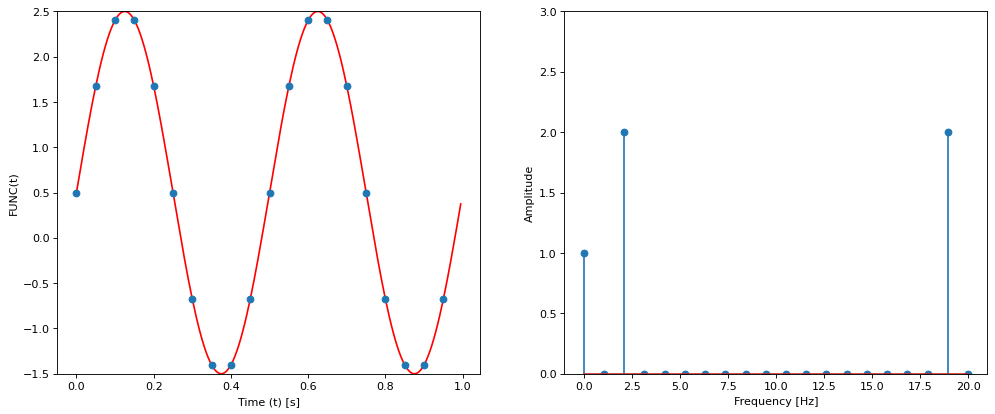

In [27]:
# Wyrysuj sygnał
func_general(f=1, w=20, func=lambda t: 0.5 + 2*np.sin(2*np.pi*t*f))

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2105513116.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


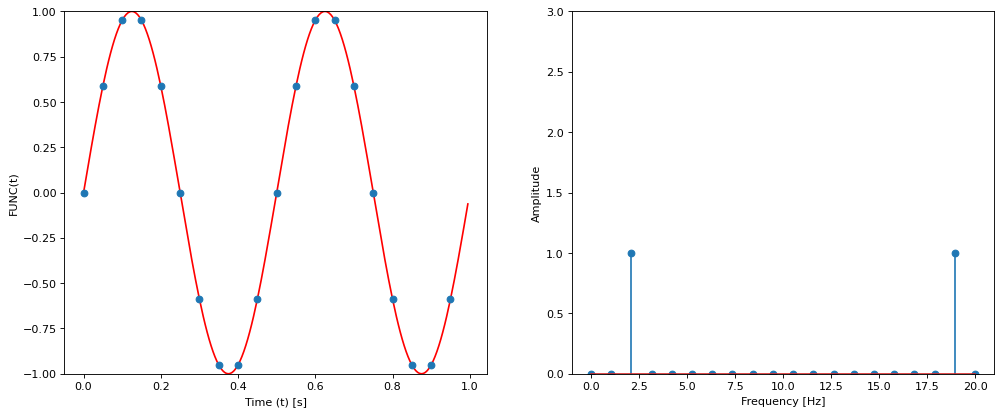

In [28]:
# faza = 0
func_general(f=1, w=20, func=lambda t: np.sin(2*np.pi*t*f))

C:\Users\grzegorz\AppData\Local\Temp/ipykernel_8184/2105513116.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, signal_f, '-*')


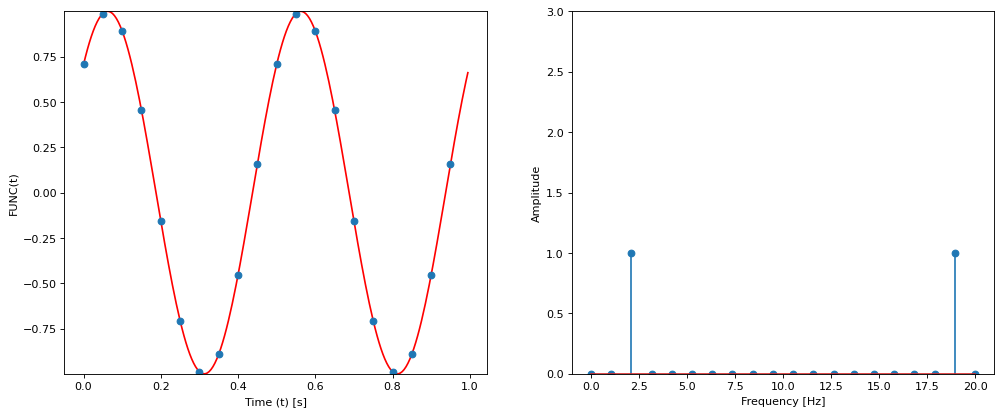

In [29]:
# faza = pi/4
func_general(f=1, w=20, func=lambda t: np.sin(2*np.pi*t*f + np.pi/4))

In [41]:
f = 1
w = 20
LP = 1
T = 1/f
TW = 1/w
t = np.arange(0, LP*T, TW)
n = len(t)

func_3e1=lambda t: np.sin(2*np.pi*t*f)
signal_1 = func_3e1(t)
signal_f1 = np.fft.fft(signal_1)
print(np.angle(signal_f1, deg=True))

func_3e2=lambda t: np.sin(2*np.pi*t*f + np.pi/4)
signal_2 = func_3e2(t)
signal_f2 = np.fft.fft(signal_2)
print(np.angle(signal_f2, deg=True))

[ 180.          -90.          135.70772846 -113.03788129  151.50677798
 -100.2322371   -12.22500628   67.53139063   28.65155221  122.24147373
  180.         -125.25550211  -28.65155221  -57.35019889   12.22500628
  102.32592855 -151.50677798  120.3887088  -135.70772846   90.        ]
[ 180.          -45.          110.93769821  180.         -169.48852767
  -78.01728813   -6.35494711   26.56505118   48.92993357  126.96148855
 -180.         -127.87498365  -48.92993357   25.32446462    6.35494711
   84.80557109  169.48852767 -115.53144089 -110.93769821   45.        ]


##### Informacja o przesunieciu nie jest tracona

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [54]:
# wygeneruj wektor x
x = np.random.random(10)
print(x)

[0.95985936 0.43172659 0.87936938 0.01771651 0.36330264 0.58939694
 0.02140567 0.92593486 0.73036477 0.65381529]


In [55]:
# oblicz fft z x
x_fft = np.fft.fft(x)

In [56]:
# oblicz ifft
x_ifft = np.fft.ifft(x_fft)

In [57]:
#porownaj x z ifft(fft(x)), wystarczy print

In [58]:
print(x)
print(x_ifft)

[0.95985936 0.43172659 0.87936938 0.01771651 0.36330264 0.58939694
 0.02140567 0.92593486 0.73036477 0.65381529]
[0.95985936+0.00000000e+00j 0.43172659-5.55111512e-18j
 0.87936938+3.26286360e-18j 0.01771651+4.49094647e-18j
 0.36330264-5.27942421e-18j 0.58939694-1.71538891e-18j
 0.02140567+5.27942421e-18j 0.92593486-1.71538891e-18j
 0.73036477-3.26286360e-18j 0.65381529+4.49094647e-18j]


In [60]:
x - np.real(x_ifft)

array([ 0.00000000e+00,  0.00000000e+00,  1.11022302e-16, -1.76941795e-16,
        5.55111512e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.11022302e-16,  0.00000000e+00])

##### Żadna informacja nie została stracona, różnice rzędu e-16 / e-17 wynikają najprawdopodobniej z dokładności liczb zmiennoprzecinkowych w komputerze